In [2]:
# import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve

In [4]:
# breast cancer dataset includes whether ppl have cancer and various other factors - want to train model to predict if someone will get breast cancer
data = load_breast_cancer()
x = data.data
y = data.target

In [9]:
# manipulate data to make sure sizes fit ?
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [10]:
# binary classification: target=0 means benign, target=1 means cancerous
df = pd.DataFrame(data=np.c_[x, y], columns=np.append(data.feature_names, ["target"]))
display(df.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [11]:
# want to split our data into testing and training - want to use some data to train the model, and then test the model with the remaining (unseen) data
# random_state --> get random data, is a seed
x_train , x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 42)

In [16]:
# this function checks how good the model is doing
def evaluate(y_true, y_pred, y_prob, model_name):
  # curly braces allow us to insert variable value without knowing it exactly
  print("Model:", model_name)

  print("\n")
  print("Confusion Matrix:")
  print(confusion_matrix(y_true, y_pred))

  print("Classification Report:")
  print(classification_report(y_true, y_pred))

  # check that probability value is not null
  if y_prob is not None:
    print("AUC Score:", roc_auc_score(y_true, y_prob))
  print("\n") # this a line break

In [18]:
# this chunk creates our ml model ! in like 5 lines --> but all the work is going through and cleaning data
# logistic regression
from sklearn.linear_model import LogisticRegression
# model will run maximum of 1000 times
# solver = 'saga' determines a way to use logistic regression ?
lr_model = LogisticRegression(max_iter = 1000, solver = 'saga') # lr_model is a variable ? LogisticRegression is a class ? this is a constructor
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)
y_prob_lr = lr_model.predict_proba(x_test)[:,1]

evaluate(y_test, y_pred_lr, y_prob_lr, "Logistic Regression")

Model: Logistic Regression


Confusion Matrix:
[[ 62   1]
 [  2 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

AUC Score: 0.9980893592004703




we see 62 tp, 106 tn, 1 and 2 fails --> pretty good model
support value is how many pos, how many neg
auc score is very close to 1 --> we're using data from scikitlearn, so its very clean and its easier to get a very high auc score

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# we're not specifying iterations here
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)
y_prob_knn = knn_model.predict_proba(x_test)[:,1]

evaluate(y_test, y_pred_knn, y_prob_knn, "K-Nearest Neighbors")

Model: K-Nearest Neighbors


Confusion Matrix:
[[ 59   4]
 [  3 105]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

AUC Score: 0.9776601998824221




In [24]:
from sklearn.svm import SVC

svm_model = SVC(probability = True) # prob = True so that we can also create y_prob_svm variable
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)
y_prob_svm = svm_model.predict_proba(x_test)[:,1]

evaluate(y_test, y_pred_svm, y_prob_svm, "Support Vector Machine")

Model: Support Vector Machine


Confusion Matrix:
[[ 61   2]
 [  3 105]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

AUC Score: 0.9964726631393297




In [28]:
# would go column by column, determine if some metric is larger than some value, assign 1 or 0 (yes or no) to it, and move down accordingly
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
y_prob_dt = dt_model.predict_proba(x_test)[:,1]

evaluate(y_test, y_pred_dt, y_prob_dt, "Decision Tree")

Model: Decision Tree


Confusion Matrix:
[[ 59   4]
 [  8 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        63
           1       0.96      0.93      0.94       108

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171

AUC Score: 0.9312169312169313




In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
y_prob_rf = rf_model.predict_proba(x_test)[:,1]

evaluate(y_test, y_pred_rf, y_prob_rf, "Random Forest")

Model: Random Forest


Confusion Matrix:
[[ 60   3]
 [  2 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

AUC Score: 0.9963991769547326




In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)
y_prob_gb = gb_model.predict_proba(x_test)[:,1]

evaluate(y_test, y_pred_gb, y_prob_gb, "Gradient Boosting")

Model: Gradient Boosting


Confusion Matrix:
[[ 59   4]
 [  3 105]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

AUC Score: 0.9948559670781892




In [32]:
from sklearn.naive_bayes import GaussianNB

gb_model = GaussianNB()
gb_model.fit(x_train, y_train)
y_preb_gb = gb_model.predict(x_test)
y_prob_gb = gb_model.predict_proba(x_test)[:,1]

evaluate(y_test, y_preb_gb, y_prob_gb, "Naive Bayes")

Model: Naive Bayes


Confusion Matrix:
[[ 57   6]
 [  5 103]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        63
           1       0.94      0.95      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

AUC Score: 0.9926513815402704




In [33]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(max_iter = 1000)
nn_model.fit(x_train, y_train)
y_preb_nn = nn_model.predict(x_test)
y_prob_nn = nn_model.predict_proba(x_test)[:,1]

evaluate(y_test, y_preb_nn, y_prob_nn, "Neural Network (MLP Classifier)")

Model: Neural Network (MLP Classifier)


Confusion Matrix:
[[ 61   2]
 [  2 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

AUC Score: 0.9970605526161082




In [35]:
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost
ab_model = AdaBoostClassifier()
ab_model.fit(x_train, y_train)
y_pred_ab = ab_model.predict(x_test)
y_prob_ab = ab_model.predict_proba(x_test)[:, 1]

# Evaluate AdaBoost
evaluate(y_test, y_pred_ab, y_prob_ab, "AdaBoost")

Model: AdaBoost


Confusion Matrix:
[[ 61   2]
 [  2 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

AUC Score: 0.9961787184009406




In [36]:
import xgboost as xgb

# Train XGBoost
xg_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xg_model.fit(x_train, y_train)
y_pred_xg = xg_model.predict(x_test)
y_prob_xg = xg_model.predict_proba(x_test)[:, 1]

# Evaluate XGBoost
evaluate(y_test, y_pred_xg, y_prob_xg, "XGBoost")

Model: XGBoost


Confusion Matrix:
[[ 61   2]
 [  3 105]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

AUC Score: 0.9944150499706055




now let's visualize the performance of these models - try to pick the best model out of these 10 we made

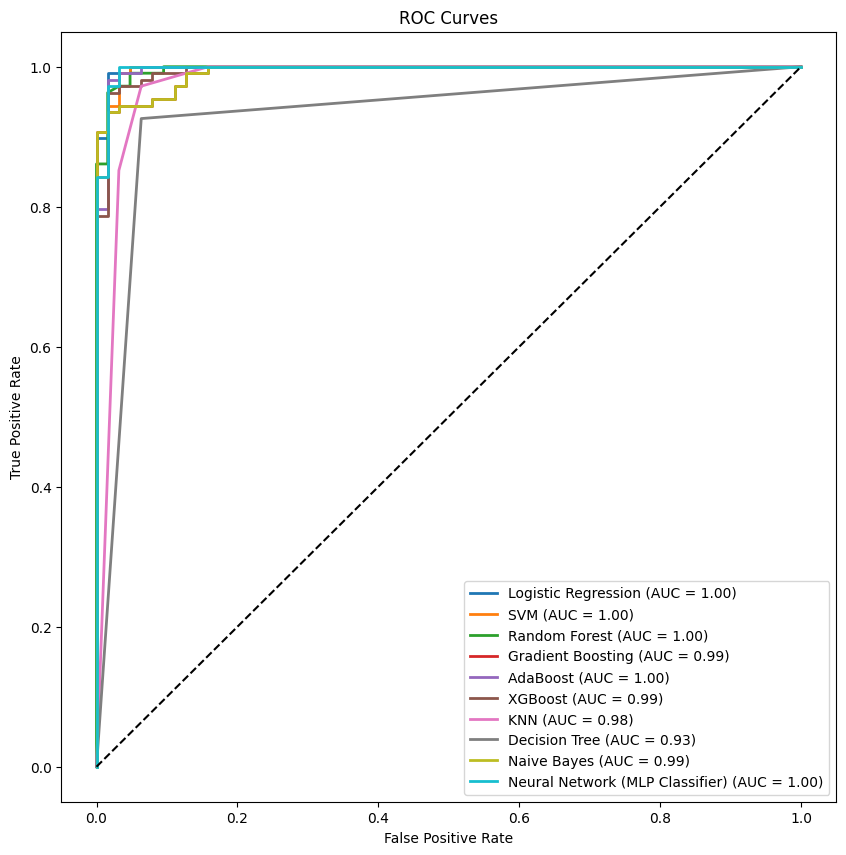

In [39]:
plt.figure(figsize = (10,10))

def plot_roc(model, X_test, y_test, label):
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

plot_roc(lr_model, x_test, y_test, 'Logistic Regression')
plot_roc(svm_model, x_test, y_test, 'SVM')
plot_roc(rf_model, x_test, y_test, 'Random Forest')
plot_roc(gb_model, x_test, y_test, 'Gradient Boosting')
plot_roc(ab_model, x_test, y_test, 'AdaBoost')
plot_roc(xg_model, x_test, y_test, 'XGBoost')
plot_roc(knn_model, x_test, y_test, 'KNN')
plot_roc(dt_model, x_test, y_test, 'Decision Tree')
plot_roc(nb_model, x_test, y_test, 'Naive Bayes')
plot_roc(nn_model, x_test, y_test, 'Neural Network (MLP Classifier)')

# Plot the diagonal line (random guessing)
plt.plot([0, 1], [0, 1], 'k--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')

# Add legends for each model
plt.legend(loc="lower right")

plt.show()

these are our roc curves - if they're closer to diagonal line, they're less accurate

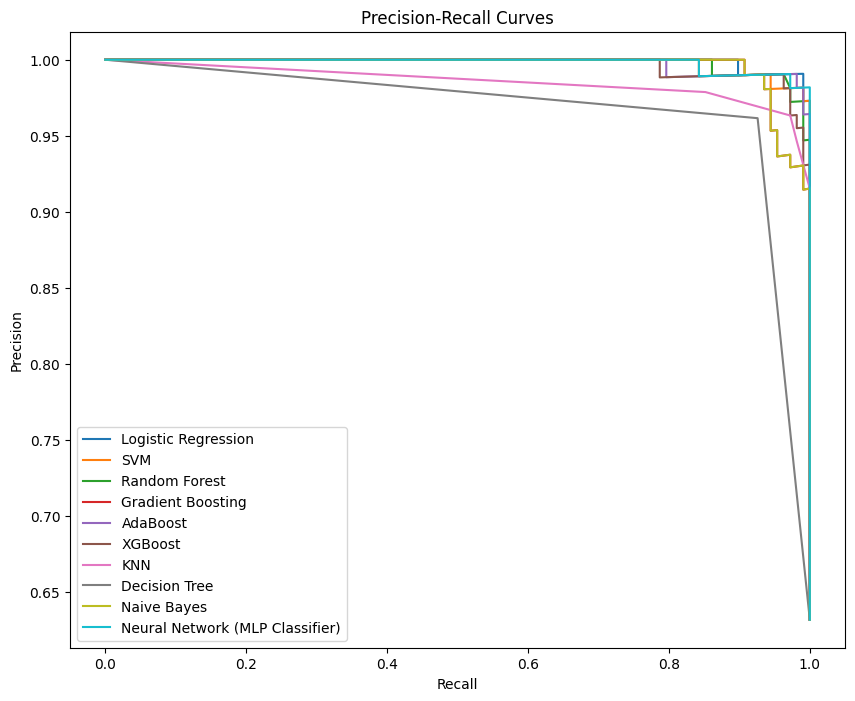

In [40]:
def plot_precision_recall_curve(model, X_test, y_test, model_name):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_prob)

        plt.plot(recall, precision, label=f'{model_name}')

# Plotting Precision-Recall Curves for all applicable models

plt.figure(figsize=(10, 8))
plot_precision_recall_curve(lr_model, x_test, y_test, 'Logistic Regression')
plot_precision_recall_curve(svm_model, x_test, y_test, 'SVM')
plot_precision_recall_curve(rf_model, x_test, y_test, 'Random Forest')
plot_precision_recall_curve(gb_model, x_test, y_test, 'Gradient Boosting')
plot_precision_recall_curve(ab_model, x_test, y_test, 'AdaBoost')
plot_precision_recall_curve(xg_model, x_test, y_test, 'XGBoost')
plot_precision_recall_curve(knn_model, x_test, y_test, 'KNN')
plot_precision_recall_curve(dt_model, x_test, y_test, 'Decision Tree')
plot_precision_recall_curve(nb_model, x_test, y_test, 'Naive Bayes')
plot_precision_recall_curve(nn_model, x_test, y_test, 'Neural Network (MLP Classifier)')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="lower left")
plt.show()

these two graphs look almost the same, just mirrored.
roc curves are better for balanced datasets
prec-recall are better for imbalanced

the end!